<a href="https://colab.research.google.com/github/JijiDharshini/CodeAlpha_Sales-Prediction-/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files

# Upload your dataset (you will be prompted to choose the file)
uploaded_files = files.upload()

Saving archive (1).zip to archive (1) (2).zip


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
import pandas as pd

# Assuming Sales_data.csv is in the 'extracted_data' directory after extraction
try:
    df = pd.read_csv("extracted_data/Sales_data.csv")
    display(df.head())
except FileNotFoundError:
    print("Error: 'Sales_data.csv' not found in the 'extracted_data' directory.")
    print("Please check the extracted files listed above and update the path if necessary.")

Error: 'Sales_data.csv' not found in the 'extracted_data' directory.
Please check the extracted files listed above and update the path if necessary.


In [26]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_file_path = 'archive (1).zip'

# Define the directory where you want to extract the contents
extract_dir = 'extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents of '{zip_file_path}' extracted to '{extract_dir}'")

# List the extracted files to verify
print("Extracted files:")
for root, dirs, files in os.walk(extract_dir):
    for name in files:
        print(os.path.join(root, name))

Contents of 'archive (1).zip' extracted to 'extracted_data'
Extracted files:
extracted_data/Advertising.csv


In [ ]:
import pandas as pd

# Assuming Advertising.csv is in the 'extracted_data' directory after extraction
try:
    df = pd.read_csv("extracted_data/Advertising.csv")
    display(df.head())
except FileNotFoundError:
    print("Error: 'Advertising.csv' not found in the 'extracted_data' directory.")
    print("Please check the extracted files listed above and update the path if necessary.")

df.info()
df.describe()
df.isnull().sum()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
# Drop missing values if any
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

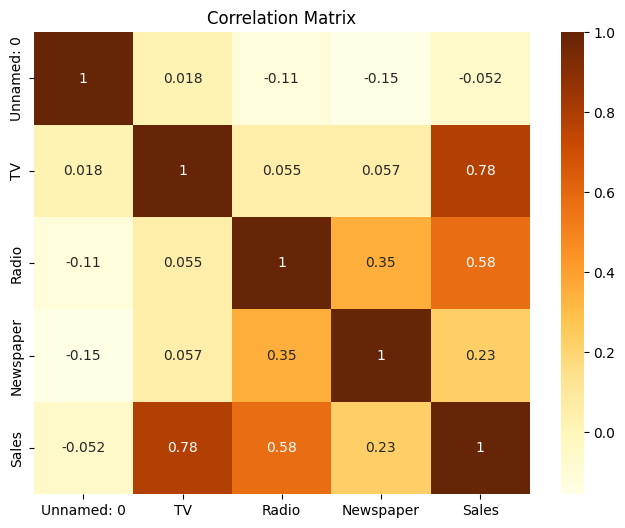

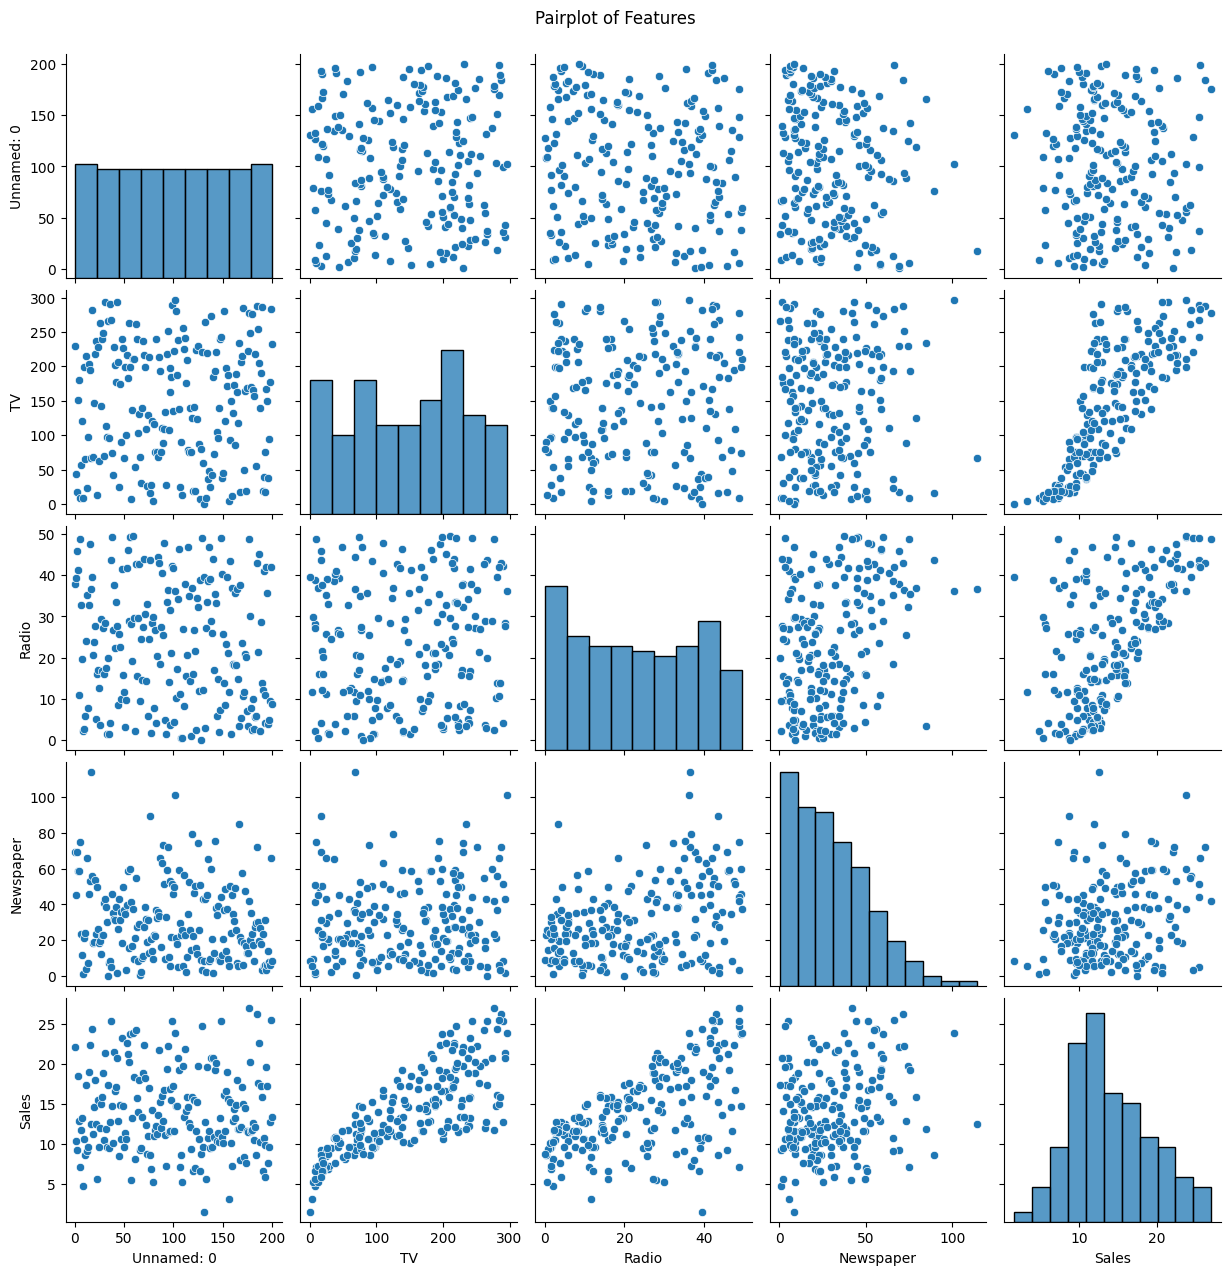

In [ ]:
# Correlation heatmap (if applicable)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [ ]:
# Separate input and output
X = df.drop('Sales', axis=1)
y = df['Sales']

# Separate numerical and categorical features
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Column transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unnamed: 0', 'TV', 'Radio',
                                                   'Newspaper']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  [])])),
                ('regressor', LinearRegression())])

R² Score: 0.8986489151417081
RMSE: 1.788576100865966


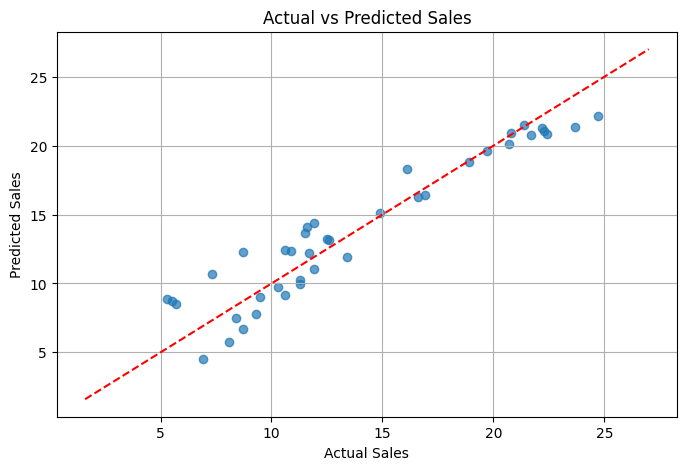

In [ ]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()

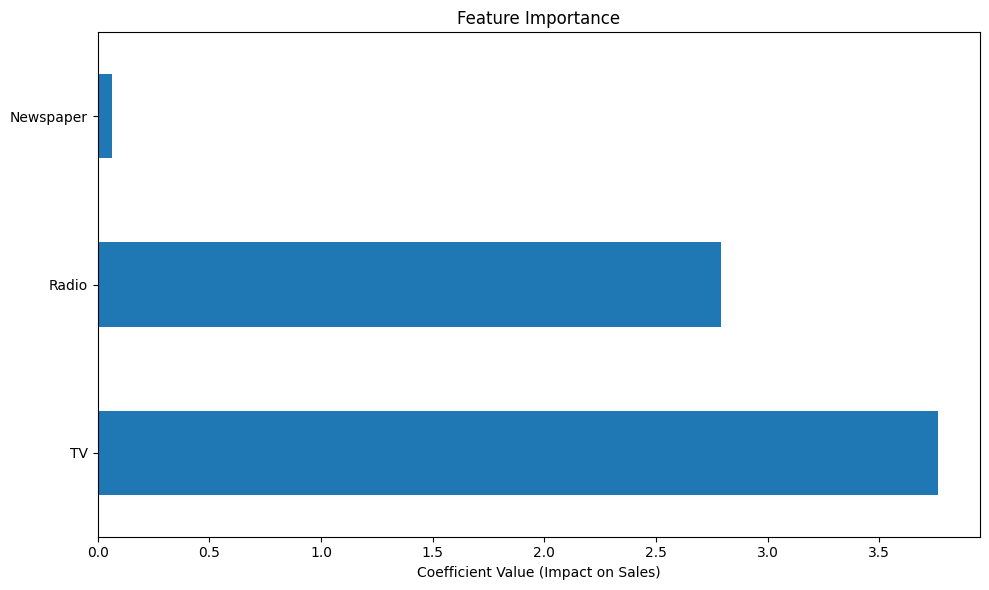

In [ ]:
# Get feature names from the numerical columns, excluding 'Unnamed: 0'
# The order of features after preprocessing will be the same as in numerical_cols
# We exclude 'Unnamed: 0' as it is likely an index
processed_feature_names = [col for col in numerical_cols if col != 'Unnamed: 0']

# Get the coefficients from the linear regression model
# The coefficients correspond to the features in the order they were processed by the ColumnTransformer
# Since 'Unnamed: 0' was the first numerical column, its coefficient is the first one.
# We take the coefficients starting from the second one to match the processed_feature_names
coefficients = model.named_steps['regressor'].coef_[1:]


# Create a pandas Series for easier plotting, using the processed feature names and coefficients
coeffs = pd.Series(coefficients, index=processed_feature_names)

# Plot the coefficients
coeffs.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.xlabel('Coefficient Value (Impact on Sales)')
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
# Explicitly delete the 'files' variable to avoid conflicts
try:
  del files
except NameError:
  pass # 'files' was not defined, no need to delete

from google.colab import files # Re-import to ensure correct module is loaded

output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv("Sales_Prediction_Output.csv", index=False)

# Download the file
files.download("Sales_Prediction_Output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>